<a href="https://colab.research.google.com/github/onuralpArsln/MlAiTutorialProjects/blob/main/5-ImageClass/CNN_MultiClass_Detailed_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datayı Githubdan hızlıca Colabe çek

Bu dataset bulk downlader eklentisi ile googledan toplanmıştır ve yapısı aşağıda veriliştir     



 Dataset yapısı


Oldukça basit bir yapıyı takip edeceğiz
                                      
data/                                           
├─ cat/             
│  ├─ image001.jpg             
│  ├─ image002.jpg             
│  ├─ ....             
├─ rabbit/             
│  ├─ image001.jpg             
│  ├─ image002.jpg             
│  ├─ ....      
├─ squirrel/             
│  ├─ image001.jpg             
│  ├─ image002.jpg             
│  ├─ ....      

In [ ]:
!wget https://github.com/onuralpArsln/MlAiTutorialProjects/raw/main/5-ImageClass/CatRabbitSqrll/data.zip -q -O data.zip

Dosyayı zipten çıkart

In [ ]:
!unzip -q data.zip

In [ ]:
!pwd


/content


Burada, os modülünü ve TensorFlow'un image araçlarını kullanarak klasörleri tarayıp görüntüleri okuyoruz ve yeniden boyutlandırıyoruz. İşlem sırasında etiketler de belirleniyor.

In [ ]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# 📂 Dataset ana klasörü
dataset_dir = 'data'  # data/cat, data/rabbit, data/squirrel

# 📌 Görselleri yükleyen fonksiyon
def load_images_from_directory(base_dir, label, img_size=(128, 128)):
    images = []
    labels = []
    for file_name in os.listdir(base_dir):
        file_path = os.path.join(base_dir, file_name)
        if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):
            img = tf.keras.preprocessing.image.load_img(file_path, target_size=img_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # normalize
            images.append(img_array)
            labels.append(label)
    return images, labels

# 🐱 Cat = 0
cat_images, cat_labels = load_images_from_directory(os.path.join(dataset_dir, 'cat'), label=0)
# 🐇 Rabbit = 1
rabbit_images, rabbit_labels = load_images_from_directory(os.path.join(dataset_dir, 'rabbit'), label=1)
# 🐿️ Squirrel = 2
squirrel_images, squirrel_labels = load_images_from_directory(os.path.join(dataset_dir, 'squirrel'), label=2)

# 🔗 Veriyi birleştir
images = np.array(cat_images + rabbit_images + squirrel_images)
labels = np.array(cat_labels + rabbit_labels + squirrel_labels)




Data Preprocessing - Resizing and Splitting
Bu aşamada, görüntüleri normalleştirdiğimizden emin olduk ve eğitim/test verilerini doğru şekilde böldük. Şimdi doğrulama verilerini eğitim verisinden ayırabiliriz:

In [ ]:
# 🔀 Train / Test ayır
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)


Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 sınıf
])

# 🔧 Derleme
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # integer label için
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install graphviz pydot

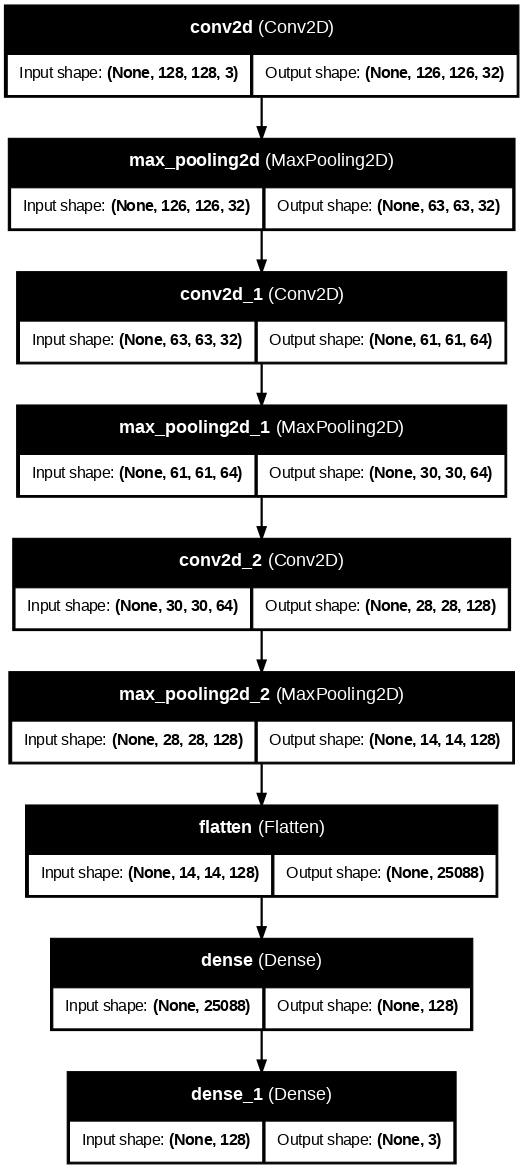

In [ ]:
# Visualize model architecture None implies flexible batch si
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True, dpi=80)

Train

In [ ]:
# 🚀 Eğitme
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4307 - loss: 1.7374 - val_accuracy: 0.3810 - val_loss: 1.0882
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 992ms/step - accuracy: 0.3580 - loss: 1.0957 - val_accuracy: 0.4444 - val_loss: 1.0722
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4238 - loss: 1.0740 - val_accuracy: 0.3810 - val_loss: 1.0636
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4019 - loss: 1.0621 - val_accuracy: 0.5079 - val_loss: 0.9778
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5822 - loss: 0.9504 - val_accuracy: 0.5714 - val_loss: 0.9760
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 979ms/step - accuracy: 0.5872 - loss: 0.8616 - val_accuracy: 0.5079 - val_loss: 0.9823
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6698 - loss: 0.7700 - val_accuracy: 0.4762 - val_loss: 0.9616
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6908 - loss: 0.7298 - val_accuracy: 0.5397 - val_loss: 0.9351
Epoc

Evaluation and Predictions

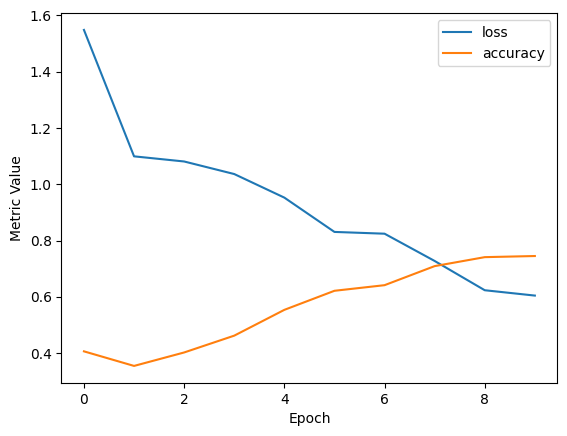

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


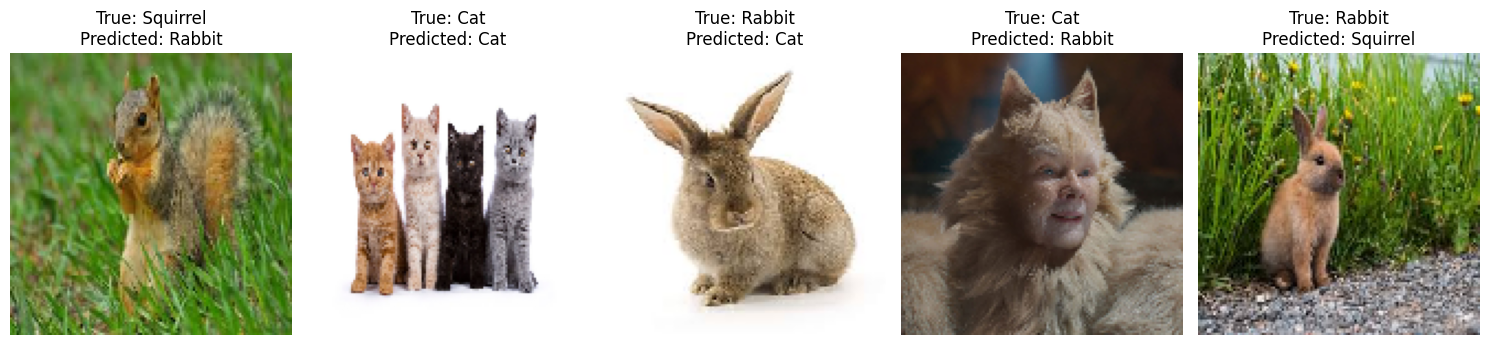

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sınıf isimlerini tanımla
class_names = ["Cat", "Rabbit", "Squirrel"]

# Test setinden 5 rastgele örnek seç
random_indices = np.random.choice(len(X_test), 5, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_indices):
    sample_image = X_test[idx]
    # Model tahmini
    prediction = model.predict(sample_image.reshape(1, 128, 128, 3))
    predicted_label_idx = np.argmax(prediction)  # softmax çıktısı için argmax
    predicted_label = class_names[predicted_label_idx]

    true_label = class_names[y_test[idx]]

    # Görüntüyü göster
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_image)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


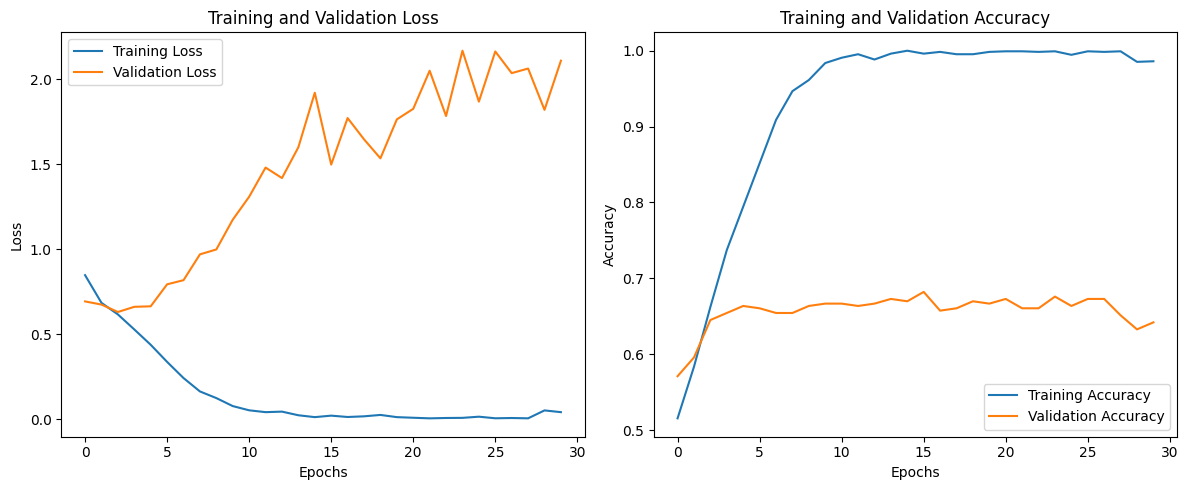

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


kaydetme

In [ ]:
# Modeli kaydet
model.save('/content/cbs_classifier.keras')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8743  100  8743    0     0  57804      0 --:--:-- --:--:-- --:--:-- 57900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


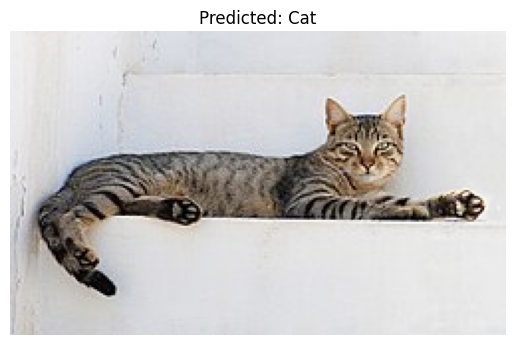

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1️⃣ Modeli yükle (.keras veya .h5)
model = tf.keras.models.load_model('/content/cbs_classifier.keras')

# 2️⃣ İnternetten resmi indir ve test.png olarak kaydet
!curl -L "https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/250px-Cat_August_2010-4.jpg" -o test.png

# 3️⃣ Resmi aç, boyutlandır ve normalize et
image = Image.open("test.png").convert("RGB")
image_resized = image.resize((128, 128))
image_array = np.array(image_resized) / 255.0
image_array = np.expand_dims(image_array, axis=0)  # (1, 128, 128, 3)

# 4️⃣ Tahmin yap
prediction = model.predict(image_array)

# 3 sınıf için argmax kullan
class_names = ["Cat", "Rabbit", "Squirrel"]
predicted_label_idx = np.argmax(prediction[0])
predicted_label = class_names[predicted_label_idx]

# 5️⃣ Sonucu göster
plt.imshow(image)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()
